In [3]:
# Basic setting
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
with open('data.pickle', 'rb') as f:
    X, y = pickle.load(f)

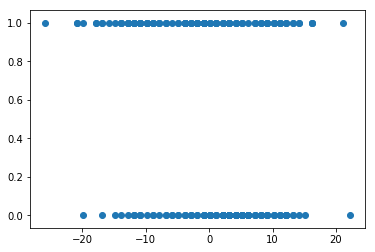

In [14]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [문제] 주어진 X, y의 데이터에 최적화된 logistic 회귀 모델을 Tensorflow와 Gradient Descent를 이용해 찾으시오.

### HINT
**Logistic 회귀**
\begin{equation*}
P(y_i=1|X_i) = \frac{1}{1 + e^{-(wX_i + b)}}
\end{equation*}

**가능도 손실 함수**
\begin{equation*}
-\frac{1}{n} \sum_{i=1}^n (y_i * log(P(y_i=1|X_i)) + (1 - y_i) * log(1 - P(y_i=1|X_i)))
\end{equation*}

In [ ]:
# Training setting
epochs = 1000
learning_rate = 0.1

#################################################
### Define model weights and bias parameters ####
############## HINT : tf.Variable ###############
w = ?
b = ?


# Perform Gradient Descent
for i in range(epochs):
    
####### Hint : Consider multiple weights  #######

    # Define MSE loss function (Hint: tf.GradientTape(), tf.reduce_mean())
    with ??? as tape:
        # Hint : tf.exp, +, /, *, -
        y_pred = 1 ? (1 ? ???(?(w ? X ? b)))
        # Hint : tf.reduce_mean, tf.math.log
        loss = -???(y ? ???(y_pred) ? (1 ? y) ? ???(1 ? y_pred))
        
    # Get gradients of parameters (Hint: tape.gradient())
    dw, db = ???(???, [?, ?])
    
    # Update model weights and bias (Hint : assign_sub())
    w.???(? ? ?)
    b.???(? ? ?)
    
#################################################
    
# Convert parameters type from tensor to numpy
w = w.numpy()
b = b.numpy()

# Print the trained parameters value
print('Trained model weights 1 : %.4f' % w)
print('Trained model bias : %.4f' % b)

In [ ]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = 1 / (1 + tf.exp(-(w*X + b)))
plt.scatter(X, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y == 0) * (y_pred.numpy() < 0.5)
index2 = (y == 1) * (y_pred.numpy() > 0.5)
index = index1 + index2
plt.scatter(X[index], y[index], color='orange')

plt.show()